In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("ssh_date.db")
df = pd.read_sql_query("SELECT * from req", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()

  month day    timest              ip  user   port    attack  \
0   фев  10  21:12:21  221.131.165.86  root      0      auth   
1   фев  10  21:12:24  221.131.165.86  root  49460  password   
2   фев  10  21:12:28  221.131.165.86  root  49460  password   
3   фев  10  21:12:32  221.131.165.86  root  49460  password   
4   фев  10  21:12:33  221.131.165.86  root      0      auth   

               alldate  one  
0  2021-02-10 21:12:21    1  
1  2021-02-10 21:12:24    1  
2  2021-02-10 21:12:28    1  
3  2021-02-10 21:12:32    1  
4  2021-02-10 21:12:33    1  


In [3]:
df['dt'] = pd.to_datetime(df['alldate'])

In [4]:
df

,month,day,timest,ip,user,port,attack,alldate,one,dt
0,фев,10,21:12:21,221.131.165.86,root,0,auth,2021-02-10 21:12:21,1,2021-02-10 21:12:21
1,фев,10,21:12:24,221.131.165.86,root,49460,password,2021-02-10 21:12:24,1,2021-02-10 21:12:24
2,фев,10,21:12:28,221.131.165.86,root,49460,password,2021-02-10 21:12:28,1,2021-02-10 21:12:28
3,фев,10,21:12:32,221.131.165.86,root,49460,password,2021-02-10 21:12:32,1,2021-02-10 21:12:32
4,фев,10,21:12:33,221.131.165.86,root,0,auth,2021-02-10 21:12:33,1,2021-02-10 21:12:33
...,...,...,...,...,...,...,...,...,...,...
163457,фев,19,16:37:32,13.66.131.233,root,57838,password,2021-02-19 16:37:32,1,2021-02-19 16:37:32
163458,фев,19,16:38:47,176.109.0.30,root,0,auth,2021-02-19 16:38:47,1,2021-02-19 16:38:47
163459,фев,19,16:38:49,176.109.0.30,root,40475,password,2021-02-19 16:38:49,1,2021-02-19 16:38:49
163460,фев,19,16:39:07,119.45.43.139,root,0,auth,2021-02-19 16:39:07,1,2021-02-19 16:39:07


In [5]:
pivot_t = pd.pivot_table(df, index='ip', values='one', aggfunc=np.sum)

In [6]:
pivot_t[1:]

,one
ip,
1.160.36.150,1
1.161.115.54,2
1.175.76.102,2
1.179.137.10,92
1.180.211.139,92
...,...
95.181.191.97,5
95.211.100.165,1
95.42.182.36,2


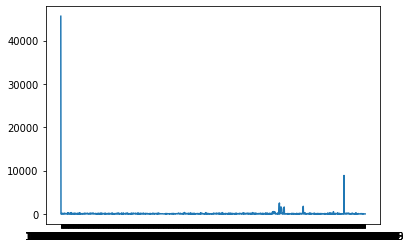

In [11]:
plt.plot(pivot_t)

In [12]:
attackers = pivot_t[1:].sort_values(['one'])

In [13]:
attackers


,one
ip,
1.160.36.150,1
119.188.242.86,1
119.136.124.79,1
200.73.129.102,1
201.236.134.154,1
...,...
221.181.185.19,1620
45.141.84.10,1756
221.131.165.85,2145


In [14]:
# pd.set_option('display.max_rows', None)
print(attackers)

                  one
ip                   
1.160.36.150        1
119.188.242.86      1
119.136.124.79      1
200.73.129.102      1
201.236.134.154     1
...               ...
221.181.185.19   1620
45.141.84.10     1756
221.131.165.85   2145
221.131.165.86   2521
80.249.131.9     8870

[1583 rows x 1 columns]


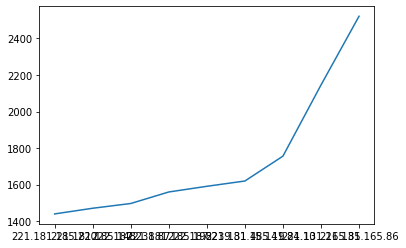

In [15]:
plt.plot(attackers[-10:-1])

array([[<AxesSubplot:title={'center':'one'}>]], dtype=object)

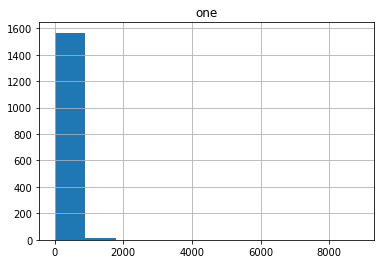

In [16]:
attackers.hist()


In [17]:
attackers.describe()

,one
count,1583.000000
mean,74.435250
std,274.072735
min,1.000000
25%,2.000000
50%,49.000000
75%,82.000000
max,8870.000000


<AxesSubplot:>

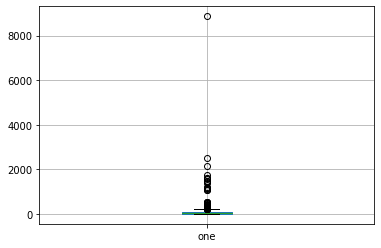

In [19]:
attackers.boxplot()

array([[<AxesSubplot:title={'center':'port'}>,
        <AxesSubplot:title={'center':'one'}>],
       [<AxesSubplot:title={'center':'dt'}>, <AxesSubplot:>]],
      dtype=object)

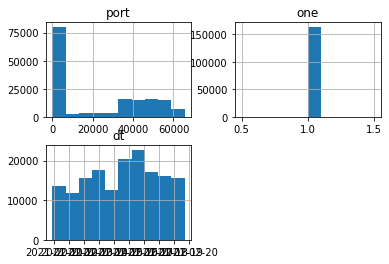

In [20]:
df.hist()

In [21]:
df.describe()

,port,one
count,163462.000000,163462.0
mean,21944.562950,1.0
std,23383.339333,0.0
min,0.000000,1.0
25%,0.000000,1.0
50%,11124.500000,1.0
75%,44813.750000,1.0
max,65532.000000,1.0


только аутентификация:

In [39]:
df[df['attack'] == 'auth']

,month,day,timest,ip,user,port,attack,alldate,one,dt
0,фев,10,21:12:21,221.131.165.86,root,0,auth,2021-02-10 21:12:21,1,2021-02-10 21:12:21
4,фев,10,21:12:33,221.131.165.86,root,0,auth,2021-02-10 21:12:33,1,2021-02-10 21:12:33
5,фев,10,21:12:33,54.38.180.93,root,0,auth,2021-02-10 21:12:33,1,2021-02-10 21:12:33
6,фев,10,21:12:35,221.131.165.86,root,0,auth,2021-02-10 21:12:35,1,2021-02-10 21:12:35
11,фев,10,21:12:49,221.131.165.86,root,0,auth,2021-02-10 21:12:49,1,2021-02-10 21:12:49
...,...,...,...,...,...,...,...,...,...,...
163452,фев,19,16:36:53,106.54.74.188,root,0,auth,2021-02-19 16:36:53,1,2021-02-19 16:36:53
163454,фев,19,16:37:12,64.225.53.31,root,0,auth,2021-02-19 16:37:12,1,2021-02-19 16:37:12
163456,фев,19,16:37:30,13.66.131.233,root,0,auth,2021-02-19 16:37:30,1,2021-02-19 16:37:30
163458,фев,19,16:38:47,176.109.0.30,root,0,auth,2021-02-19 16:38:47,1,2021-02-19 16:38:47


In [46]:
df[df['attack'] == 'password'][['ip','dt']]

,ip,dt
1,221.131.165.86,2021-02-10 21:12:24
2,221.131.165.86,2021-02-10 21:12:28
3,221.131.165.86,2021-02-10 21:12:32
7,54.38.180.93,2021-02-10 21:12:36
8,221.131.165.86,2021-02-10 21:12:37
...,...,...
163453,106.54.74.188,2021-02-19 16:36:55
163455,64.225.53.31,2021-02-19 16:37:14
163457,13.66.131.233,2021-02-19 16:37:32
163459,176.109.0.30,2021-02-19 16:38:49


In [66]:
attacker80 = df[df['ip'] == '80.249.131.9'][['ip','dt', 'one']]

In [67]:
attacker80

,ip,dt,one
26566,80.249.131.9,2021-02-12 16:43:58,1
26568,80.249.131.9,2021-02-12 16:44:02,1
26572,80.249.131.9,2021-02-12 16:44:12,1
26574,80.249.131.9,2021-02-12 16:44:17,1
26576,80.249.131.9,2021-02-12 16:44:21,1
...,...,...,...
162162,80.249.131.9,2021-02-19 13:52:05,1
162166,80.249.131.9,2021-02-19 13:52:14,1
162170,80.249.131.9,2021-02-19 13:52:23,1
162172,80.249.131.9,2021-02-19 13:52:31,1


In [63]:
attacker80['dt']

26566    2021-02-12 16:43:58
26568    2021-02-12 16:44:02
26572    2021-02-12 16:44:12
26574    2021-02-12 16:44:17
26576    2021-02-12 16:44:21
                 ...        
162162   2021-02-19 13:52:05
162166   2021-02-19 13:52:14
162170   2021-02-19 13:52:23
162172   2021-02-19 13:52:31
162174   2021-02-19 13:52:41
Name: dt, Length: 8870, dtype: datetime64[ns]

In [64]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

<AxesSubplot:>

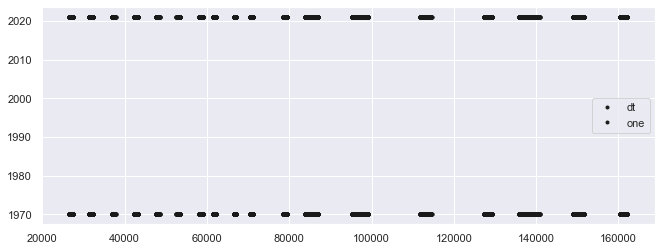

In [72]:
attacker80.plot(style='k.')